In [1]:
#Import all libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #visualization library
import seaborn as sns #visualization library and it use matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv')
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.duplicated().sum()

240

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.shape

(1599, 12)

In [10]:
len(data)

1599

<AxesSubplot:>

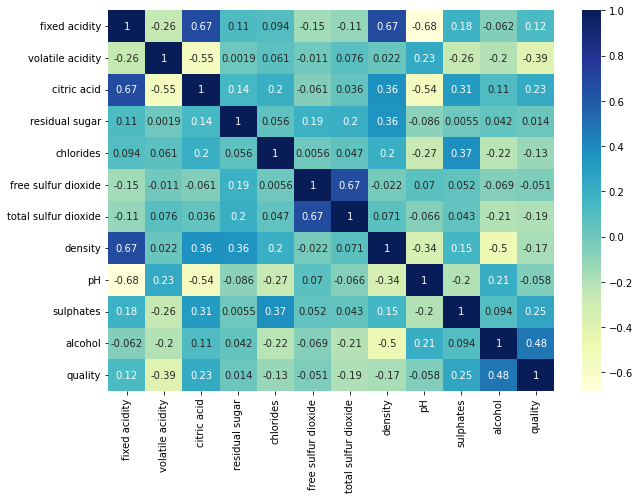

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
x = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
y = data['quality'].values.reshape(-1,1)

In [28]:
x.shape,y.shape

((1599, 11), (1599, 1))

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

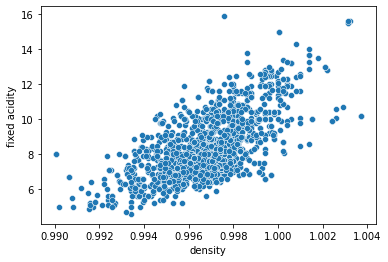

In [31]:
sns.scatterplot(x='density',y='fixed acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='count'>

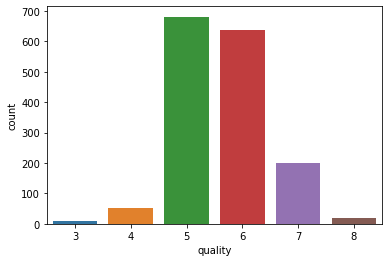

In [35]:
sns.countplot(x='quality',data= data)

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state= 42)

In [38]:
xtrain.shape, xtest.shape

((1279, 11), (320, 11))

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [43]:
ypred = reg.predict(xtest)
ypred

array([[5.34666441],
       [5.05631345],
       [5.66446972],
       [5.46451484],
       [5.72518476],
       [5.27928659],
       [5.03421667],
       [5.12623347],
       [5.74534288],
       [5.68665032],
       [6.13959677],
       [5.23386892],
       [5.54991474],
       [5.25825299],
       [5.44810502],
       [6.46828999],
       [5.15018088],
       [5.59105157],
       [6.5560658 ],
       [5.32255751],
       [5.3918385 ],
       [5.19610791],
       [5.94475739],
       [6.36197631],
       [5.35484893],
       [5.41907575],
       [6.36483321],
       [5.35121573],
       [5.172392  ],
       [6.16987311],
       [5.25263058],
       [5.50657406],
       [5.75422105],
       [5.39101712],
       [5.45331031],
       [5.02757499],
       [6.16173243],
       [5.68661555],
       [5.6486077 ],
       [6.165471  ],
       [5.52872593],
       [5.24414488],
       [6.17724727],
       [5.16500868],
       [5.87598332],
       [5.81317121],
       [6.41982782],
       [5.605

In [52]:
table = pd.DataFrame({"Actual": ytest.squeeze(), "Predicted": ypred.squeeze()})
print(table.to_string())

     Actual  Predicted
0         6   5.346664
1         5   5.056313
2         6   5.664470
3         5   5.464515
4         6   5.725185
5         5   5.279287
6         5   5.034217
7         5   5.126233
8         5   5.745343
9         6   5.686650
10        7   6.139597
11        3   5.233869
12        5   5.549915
13        5   5.258253
14        6   5.448105
15        7   6.468290
16        5   5.150181
17        7   5.591052
18        8   6.556066
19        5   5.322558
20        5   5.391839
21        6   5.196108
22        5   5.944757
23        6   6.361976
24        6   5.354849
25        6   5.419076
26        7   6.364833
27        6   5.351216
28        5   5.172392
29        6   6.169873
30        5   5.252631
31        5   5.506574
32        6   5.754221
33        5   5.391017
34        6   5.453310
35        5   5.027575
36        7   6.161732
37        5   5.686616
38        4   5.648608
39        6   6.165471
40        5   5.528726
41        5   5.244145
42        7

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mse = mean_squared_error(ytest,ypred)

In [55]:
mse

0.39002514396395493